In [1]:
from torch.utils.data import Dataset

class MyDataset(Dataset):
    def __init__(self):
        pass
    
    def __len__(self):
        pass
    
    def __getitem__(self, idx):
        pass

In [2]:
import os
from PIL import Image
import torchvision.transforms as tf

class MyDataset(Dataset):
    def __init__(self, img_dir, transform):
        self.img_dir = img_dir
        # 获取图像路径下的所有文件
        self.img_files = os.listdir(self.img_dir)
        self.transform = transform
        
        # 确保路径下的文件数目不唯一
        if len(self.img_files) == 0:
            raise ValueError("No data in img_dir!")
    
    def __len__(self):
        return len(self.img_files)
    
    def __getitem__(self, idx):
        # 打开idx对应的图片
        img = Image.open(os.path.join(self.img_dir, self.img_files[idx]))
        # 对图像进行处理以满足后续的任务
        img = self.transform(img)
        return img, self.img_files[idx]

In [3]:
my_dataset = MyDataset("data/", tf.ToTensor())
print(my_dataset[0][0].size(), my_dataset[0][1])
print(len(my_dataset))

torch.Size([3, 256, 256]) 2011-06-20 08_47_21.jpg
4


In [4]:
for i in range(len(my_dataset)):
    print(my_dataset[i][1])

2011-06-20 08_47_21.jpg
2011-06-26 19_33_40.jpg
2011-07-05 11_52_10.jpg
2011-07-06 16_55_20.jpg


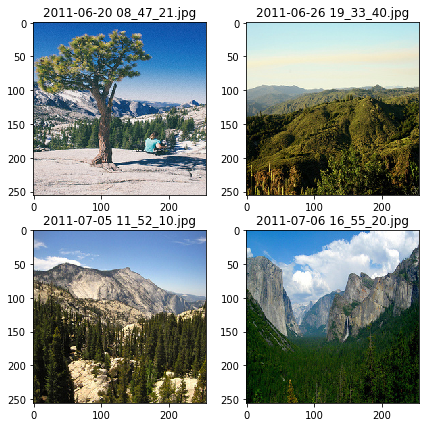

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(my_dataset[i][0].numpy().transpose(1, 2, 0))
    plt.title(my_dataset[i][1])
plt.savefig("check_dataset.png", dpi=500, bbox_inches="tight")
plt.show()